In [ ]:
# This model seems to be overfitting a lot
#  TOBIT 
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

# -------------------
# Load and preprocess
# -------------------

df = pd.read_csv("/Users/tobitlouis/Downloads/S27FE-10K.csv")

# Separate features and target
X = df.drop('realized_volatility', axis=1).values
y = df['realized_volatility'].values

# Log transform target
y = np.log1p(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

✅ XGBoost Results:
  MSE: 0.00000001
  R^2: 0.9985


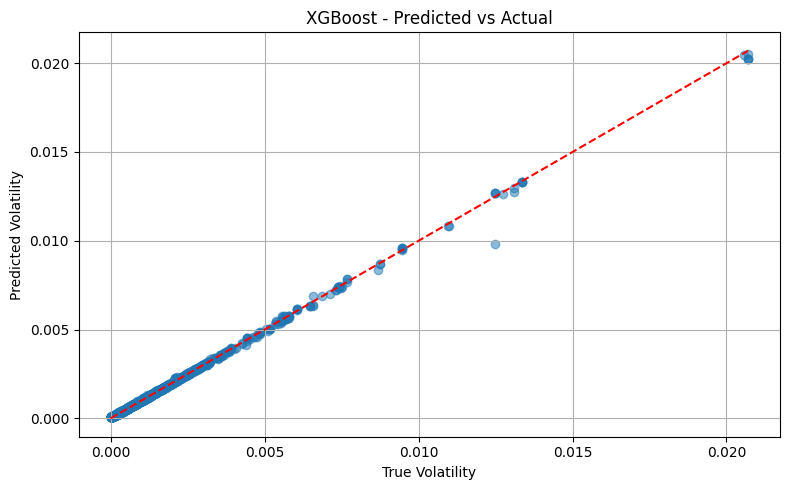

In [ ]:
# -------------------
# Train/test split
# -------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# -------------------
# Train XGBoost Regressor
# -------------------

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)

# -------------------
# Predict and evaluate
# -------------------

y_pred_log = xgb_model.predict(X_test)

# Invert log1p
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"✅ XGBoost Results:")
print(f"  MSE: {mse:.8f}")
print(f"  R^2: {r2:.4f}")

# -------------------
# Plot predictions
# -------------------

plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True Volatility")
plt.ylabel("Predicted Volatility")
plt.title("XGBoost - Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ Cross-Validation Summary:
  Avg R²:  0.9983 ± 0.0011
  Avg MSE: 0.00000001 ± 0.00000000


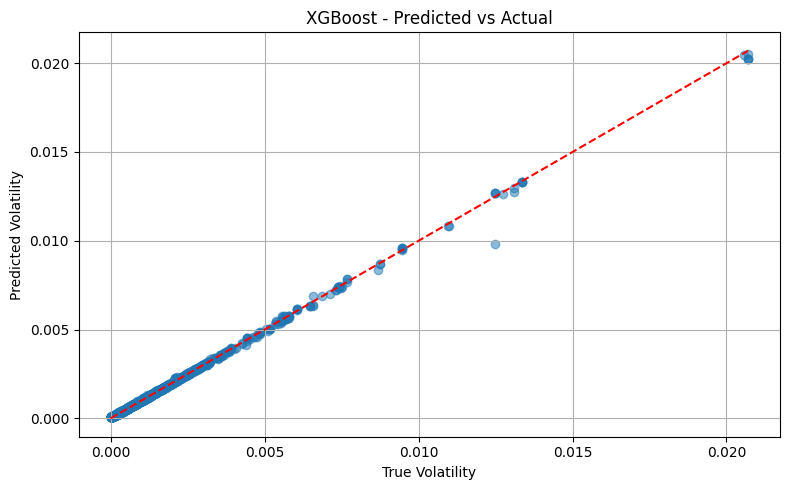

In [9]:
# Cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores, mse_scores = [], []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = xgb.XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = np.expm1(model.predict(X_test))
    true = np.expm1(y_test)

    mse_scores.append(mean_squared_error(true, preds))
    r2_scores.append(r2_score(true, preds))

print(f"\n✅ Cross-Validation Summary:")
print(f"  Avg R²:  {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"  Avg MSE: {np.mean(mse_scores):.8f} ± {np.std(mse_scores):.8f}")


plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True Volatility")
plt.ylabel("Predicted Volatility")
plt.title("XGBoost - Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()